In [1]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('stock-data.csv')

# Extract the 'open' column (assuming it is the 4th column)
open_value = dataset.iloc[:, 3]

# Remove rows where 'open_value' is missing
open_value = open_value.dropna()

# Convert into a column vector
open_value = open_value.values.reshape(-1, 1)

# Print the first 5 values and the shape
print(open_value[:5])
print(open_value.shape)

[[3.2912271 ]
 [3.30460596]
 [3.30460596]
 [3.30460596]
 [3.38488007]]
(11174, 1)


In [2]:
# Remove the first 4000 values
open_value = open_value[4000:]

# Print the first 5 values and the shape
print(open_value[:5])
print(open_value.shape)

[[41.25 ]
 [41.875]
 [42.125]
 [41.875]
 [42.375]]
(7174, 1)


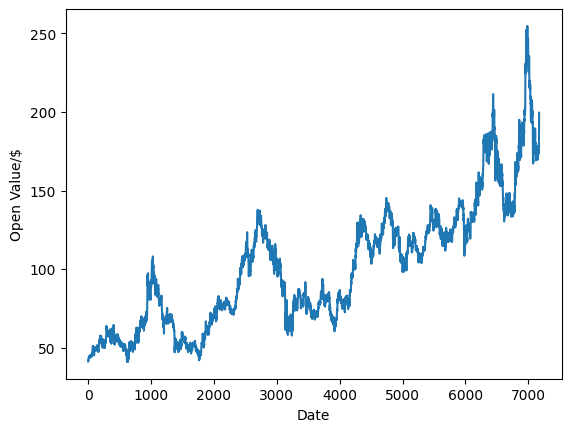

In [3]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler  


scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)

print(open_value[:5])
print(scaled_open_value[:5])

[[41.25 ]
 [41.875]
 [42.125]
 [41.875]
 [42.375]]
[[0.00146142]
 [0.00438427]
 [0.00555341]
 [0.00438427]
 [0.00672255]]


In [5]:
data = []
target = []

for i in range(100, open_value.shape[0] - 5):  # Subtract 5 to ensure we have enough data for target
    data.append(scaled_open_value[i - 100:i])  # 100 previous values
    target.append(scaled_open_value[i:i + 5])  # The next 5 values

In [6]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(7069, 100, 1)
(7069, 5, 1)


In [7]:
data=data_np
target=target_np

In [8]:
train_data=data[:6000]
train_target=target[:6000]

test_data=data[6000:]
test_target=target[6000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(6000, 100, 1)
(1069, 100, 1)
(6000, 5, 1)
(1069, 5, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=64, return_sequences=True, input_shape=(100, 1), kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(units=32, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Adding Conv1D layers
model.add(Conv1D(filters=64, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.5))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(5))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Assuming you have X_train, y_train, X_val, y_val
# Train the model with the callback
# model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])


c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 32)        │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 98, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 47, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 23, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 736)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         3,685 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,765 (178.77 KB)

 Trainable params: 45,573 (178.02 KB)

 Non-trainable params: 192 (768.00 B)

In [11]:
history=model.fit(train_data,train_target,epochs=30,validation_data=(test_data,test_target))

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.8211 - val_loss: 0.4372
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1257 - val_loss: 0.3033
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0512 - val_loss: 0.1476
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0286 - val_loss: 0.0775
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0180 - val_loss: 0.0574
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - loss: 0.0122 - val_loss: 0.0454
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - loss: 0.0085 - val_loss: 0.0209
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - loss: 0.0067 - val_loss: 0.0233
Epoch 9/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0059 - val_loss: 0.0565
Epoch 10/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0050 - val_loss: 0.0170
Epoch 11/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0043 - val_loss: 0.0496
Epoch 12/30
188/188 ━━━━━━━━━━━━━━━

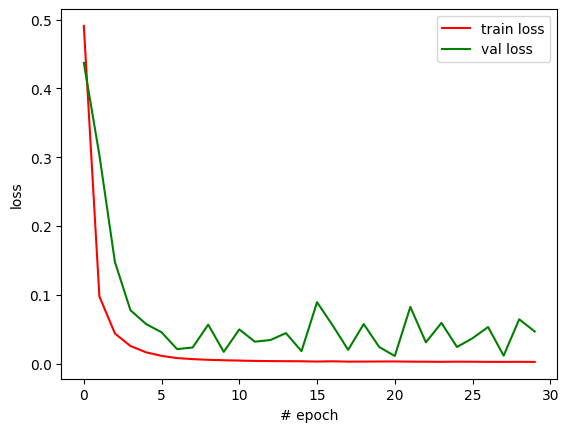

In [12]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict the values using the trained model
predictions = model.predict(test_data)

# Flatten the predictions and test_target to 1D arrays
predictions = predictions.reshape(-1)
test_target = test_target.reshape(-1)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_target, predictions))
print(f"RMSE: {rmse}")

# 2. Directional Accuracy
# Compute the direction of actual and predicted values
actual_direction = np.sign(np.diff(test_target))  # Direction of actual values
predicted_direction = np.sign(np.diff(predictions))  # Direction of predicted values

# Directional accuracy is the percentage of times the predicted direction matches the actual direction
directional_accuracy = np.mean(actual_direction == predicted_direction) * 100
print(f"Directional Accuracy: {directional_accuracy}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
RMSE: 0.21537075395984415
Directional Accuracy: 49.47604790419162%
